# Steam Games Data Science Project
This project explores a dataset of Steam games and uses machine learning models to predict popularity based on game features. We'll use visualizations, data preprocessing, and two ML models.

## Load the Data

In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Basic Data Overview

In [47]:
# Checking basic information about the dataset
df.info()

# Displaying column names
df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Index: 97410 entries, 20200 to 3054200
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       97404 non-null  object 
 1   Name                        97410 non-null  object 
 2   Release date                97410 non-null  object 
 3   Estimated owners            97410 non-null  int64  
 4   Peak CCU                    97410 non-null  int64  
 5   Required age                97410 non-null  float64
 6   Price                       97410 non-null  int64  
 7   DiscountDLC count           97410 non-null  int64  
 8   About the game              92540 non-null  object 
 9   Supported languages         97410 non-null  object 
 10  Full audio languages        97410 non-null  object 
 11  Reviews                     10125 non-null  object 
 12  Header image                97410 non-null  object 
 13  Website                     42

['AppID',
 'Name',
 'Release date',
 'Estimated owners',
 'Peak CCU',
 'Required age',
 'Price',
 'DiscountDLC count',
 'About the game',
 'Supported languages',
 'Full audio languages',
 'Reviews',
 'Header image',
 'Website',
 'Support url',
 'Support email',
 'Windows',
 'Mac',
 'Linux',
 'Metacritic score',
 'Metacritic url',
 'User score',
 'Positive',
 'Negative',
 'Score rank',
 'Achievements',
 'Recommendations',
 'Notes',
 'Average playtime forever',
 'Average playtime two weeks',
 'Median playtime forever',
 'Median playtime two weeks',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

## Data Cleaning
We will clean the dataset by selecting relevant columns and handling missing values.

In [48]:

# Select relevant columns
df_clean = df[['Name', 'Required age', 'Price', 'Positive', 'Negative', 'Average playtime forever', 'Genres']].copy()
df_clean[['Price', 'Required age']] = df_clean[['Required age', 'Price']]

# Drop rows with missing or zero values in essential columns
df_clean.dropna(inplace=True)
df_clean = df_clean[(df_clean['Positive'] > 0) & (df_clean['Negative'] > 0)]

# Add a target column: whether a game is popular or not (based on positive reviews)
df_clean['Popular'] = (df_clean['Positive'] > df_clean['Negative']).astype(int)

df_clean.head()

,Name,Required age,Price,Positive,Negative,Average playtime forever,Genres,Popular
20200,"Oct 21, 2008",0,19.99,6,11,0,"Casual,Indie,Sports",0
655370,"Oct 12, 2017",0,0.99,53,5,0,"Action,Indie",1
1139950,"Feb 3, 2020",0,0.00,50,8,0,"Adventure,Indie",1
1469160,"Feb 26, 2021",0,0.00,87,49,0,"Adventure,Casual,Free to Play,Massively Multip...",1
1659180,"Jan 9, 2022",0,10.99,21,7,0,"Indie,Strategy",1


## Data Visualization
Let's explore some visualizations.

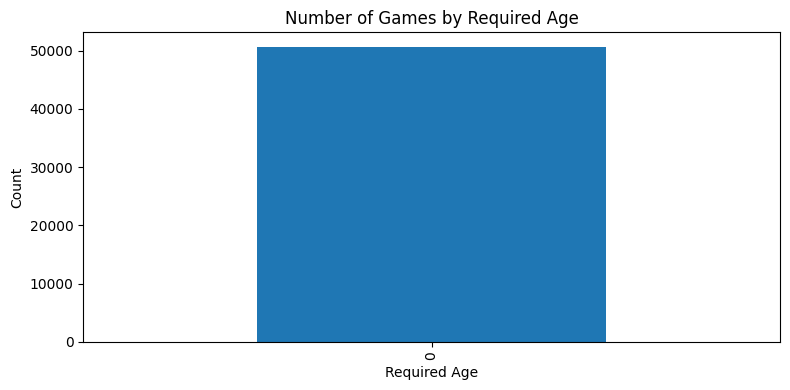

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Game count by Required Age
plt.figure(figsize=(8, 4))
df_clean['Required age'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Games by Required Age")
plt.xlabel("Required Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

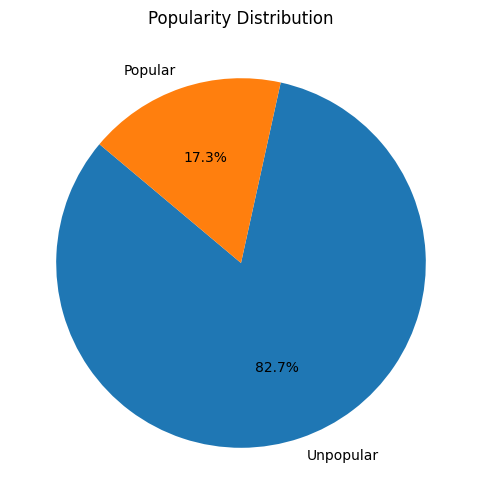

In [50]:
# Pie chart: Distribution of Popular vs Unpopular Games
plt.figure(figsize=(6, 6))
df_clean['Popular'].value_counts().plot.pie(labels=['Unpopular', 'Popular'], autopct='%1.1f%%', startangle=140)
plt.title("Popularity Distribution")
plt.ylabel("")
plt.show()

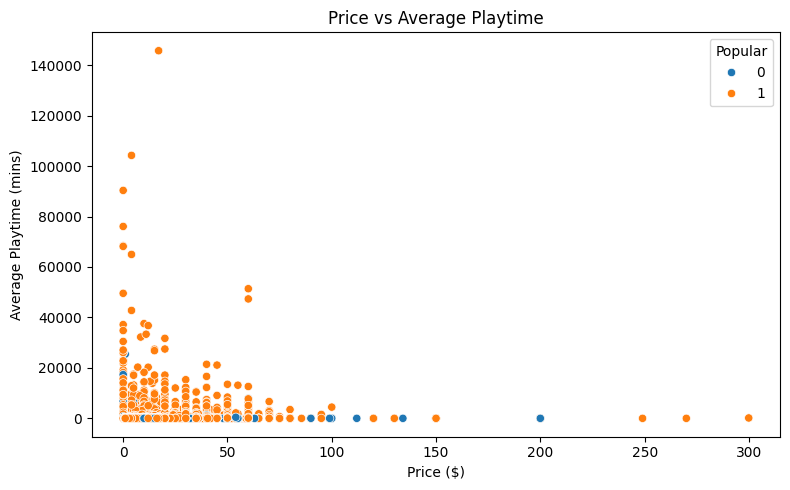

In [51]:
# Scatter plot: Price vs Average Playtime
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Price', y='Average playtime forever', hue='Popular')
plt.title("Price vs Average Playtime")
plt.xlabel("Price ($)")
plt.ylabel("Average Playtime (mins)")
plt.tight_layout()
plt.show()

## Machine Learning Models
We'll use Logistic Regression and Random Forest Classifier to predict if a game is popular.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features and target
X = df_clean[['Price', 'Required age', 'Average playtime forever']]
y = df_clean['Popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results:
[[   0 1757]
 [   0 8366]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1757
           1       0.83      1.00      0.90      8366

    accuracy                           0.83     10123
   macro avg       0.41      0.50      0.45     10123
weighted avg       0.68      0.83      0.75     10123

Accuracy: 0.8264348513286575


c:\Users\DELL\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\Documents\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest Classifier

In [54]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Results:
[[  38 1719]
 [ 125 8241]]
              precision    recall  f1-score   support

           0       0.23      0.02      0.04      1757
           1       0.83      0.99      0.90      8366

    accuracy                           0.82     10123
   macro avg       0.53      0.50      0.47     10123
weighted avg       0.72      0.82      0.75     10123

Accuracy: 0.8178405610984886


### Histogram: Distribution of Game Prices

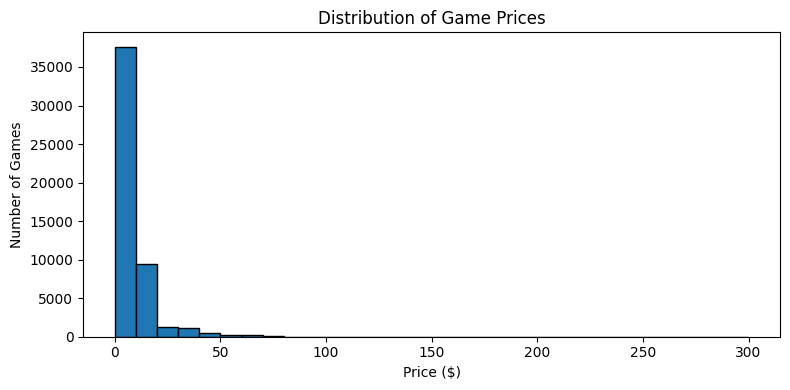

In [55]:
plt.figure(figsize=(8, 4))
df_clean['Price'].plot.hist(bins=30, edgecolor='black')
plt.title("Distribution of Game Prices")
plt.xlabel("Price ($)")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

### Boxplot: Playtime by Popularity

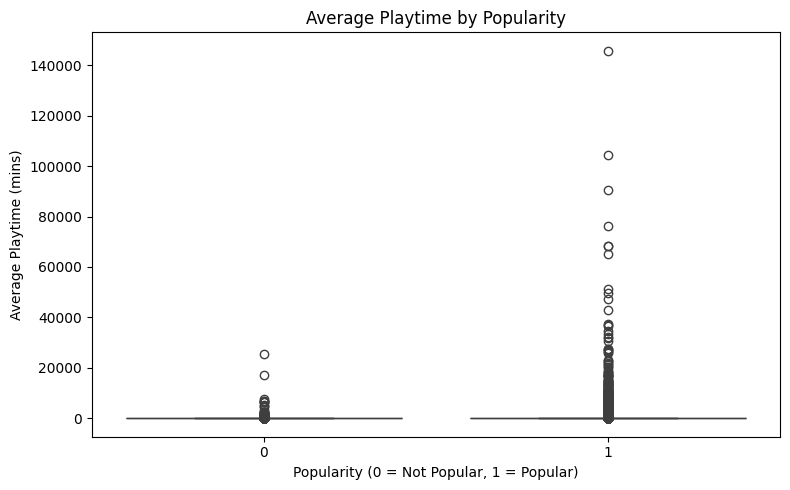

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Popular', y='Average playtime forever', data=df_clean)
plt.title("Average Playtime by Popularity")
plt.xlabel("Popularity (0 = Not Popular, 1 = Popular)")
plt.ylabel("Average Playtime (mins)")
plt.tight_layout()
plt.show()

### Heatmap: Feature Correlation

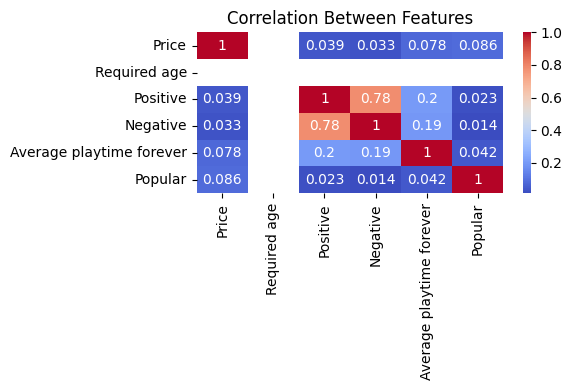

In [57]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_clean[['Price', 'Required age', 'Positive', 'Negative', 'Average playtime forever', 'Popular']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()

### Bar Chart: Top 10 Most Common Genres

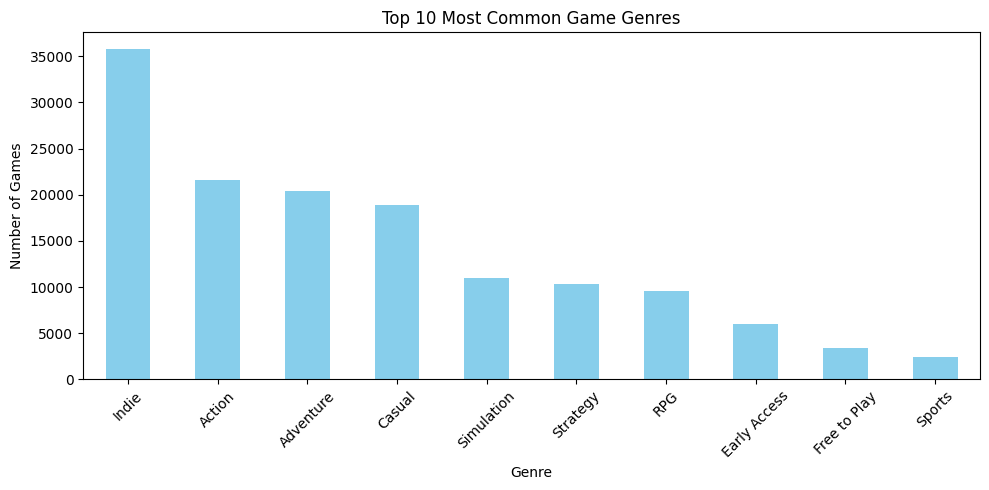

In [58]:

# Count top genres by splitting and exploding the 'Genres' column
genre_series = df_clean['Genres'].str.split(',').explode().str.strip()
top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10, 5))
top_genres.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Game Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pie Chart: Average Playtime Categories

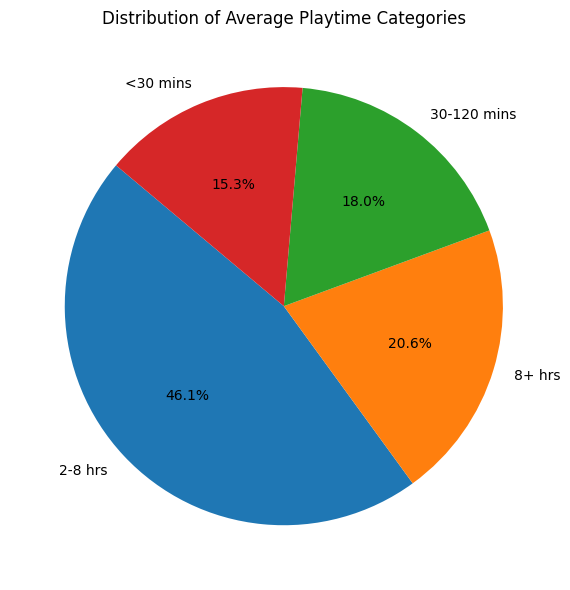

In [59]:

# Categorize games based on playtime
bins = [0, 30, 120, 500, df_clean['Average playtime forever'].max()]
labels = ['<30 mins', '30-120 mins', '2-8 hrs', '8+ hrs']
df_clean['Playtime Category'] = pd.cut(df_clean['Average playtime forever'], bins=bins, labels=labels)

# Pie chart
plt.figure(figsize=(6, 6))
df_clean['Playtime Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Average Playtime Categories")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Word Cloud: Game Genres

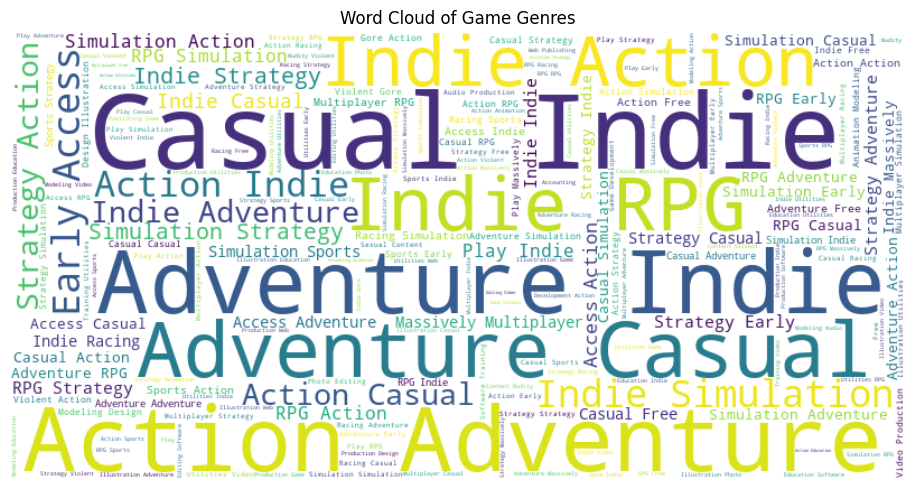

In [60]:

from wordcloud import WordCloud

# Combine all genres into a single string
text = " ".join(genre_series.dropna())

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Game Genres")
plt.tight_layout()
plt.show()


### Trendline: Price vs Positive Reviews

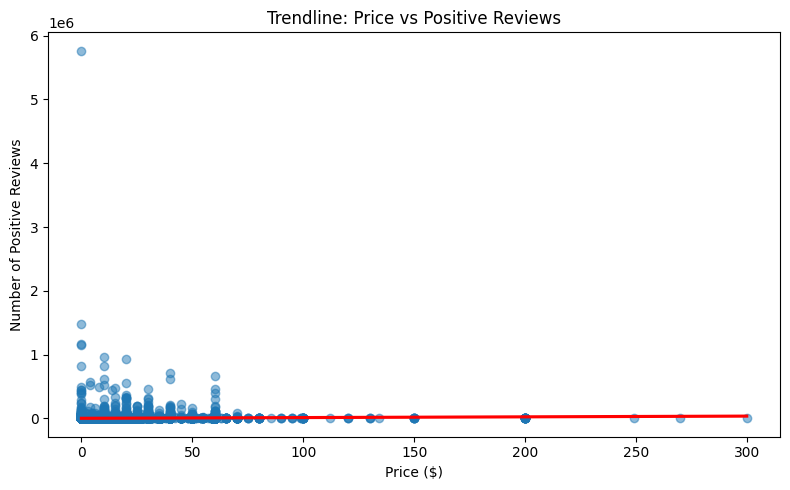

In [61]:

plt.figure(figsize=(8, 5))
sns.regplot(data=df_clean, x='Price', y='Positive', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Trendline: Price vs Positive Reviews")
plt.xlabel("Price ($)")
plt.ylabel("Number of Positive Reviews")
plt.tight_layout()
plt.show()


### Cluster Plot: KMeans Clustering on Game Features

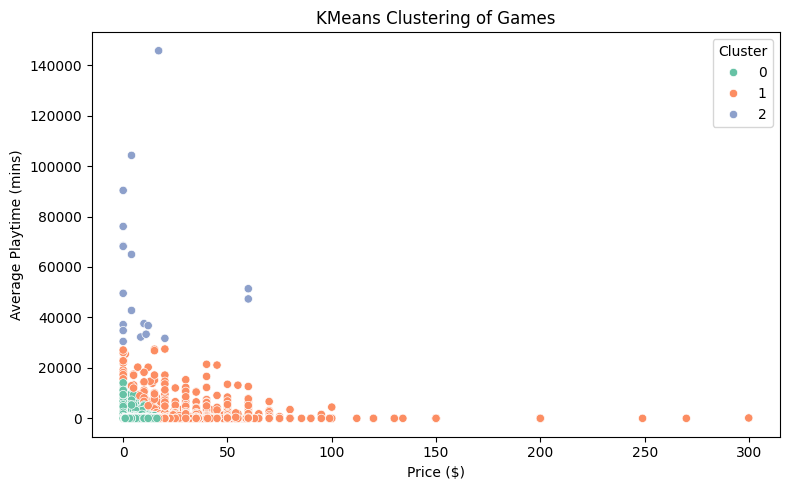

In [62]:
from sklearn.cluster import KMeans
# Use playtime and price for clustering
X_cluster = df_clean[['Price', 'Average playtime forever']].copy()
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Average playtime forever', hue='Cluster', data=df_clean, palette='Set2')
plt.title("KMeans Clustering of Games")
plt.xlabel("Price ($)")
plt.ylabel("Average Playtime (mins)")
plt.tight_layout()
plt.show()
